In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [7]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2,
       1])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result

,0,1
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,2,2
7,1,1
8,1,1
9,0,0


In [13]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [15]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.41489372e+00, -1.82220729e-01,  3.96588776e+00,
        -7.77022451e-01,  4.20321478e-02, -1.84275708e+00,
         4.44485308e+00,  4.20140066e+00, -6.63414163e-01,
        -9.97609636e-01, -5.83776531e-01,  3.34283565e+00,
         1.22955183e-02],
       [-2.10773576e+00, -8.21179494e-01, -6.02317113e+00,
         3.78777478e-01, -3.16138142e-03, -7.02310213e-01,
         1.63448492e+00,  1.50915726e+00,  9.57563348e-01,
        -5.44917301e-01,  4.24864043e+00,  2.87530588e-01,
        -7.34035002e-03],
       [-3.24439177e-01,  1.26265763e+00,  2.70303920e+00,
         4.82598323e-01, -4.79938063e-02,  3.16632824e+00,
        -7.56219397e+00, -7.10277314e+00, -3.89015132e-01,
         1.92220219e+00, -4.64466431e+00, -4.49775641e+00,
        -5.93559368e-03]])

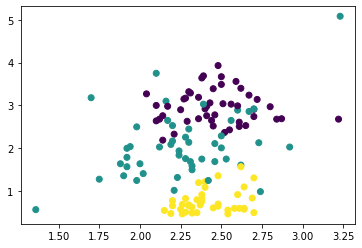

In [16]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [17]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

In [19]:
y_train

array([0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1,
       1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1,
       1])

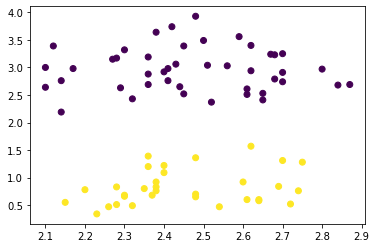

In [18]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [19]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [20]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.46954545, 2.96363636],
       [2.4496875 , 0.82375   ]])

C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


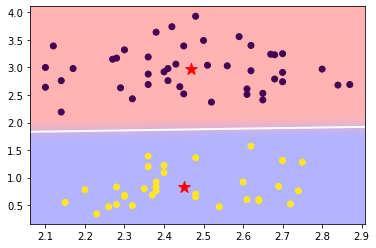

In [21]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [22]:
# второй признак в 17 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  1.71845536, -16.21148437]])

In [23]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [24]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [27]:
lr.predict(small_test)

array([0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2])

In [28]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [29]:
lr.coef_

array([[ 0.07511345, -3.10961573]])

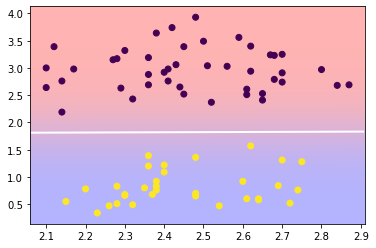

In [30]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [1]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [8]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [11]:
y

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1])

In [10]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

NameError: name 'plt' is not defined

In [35]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [37]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

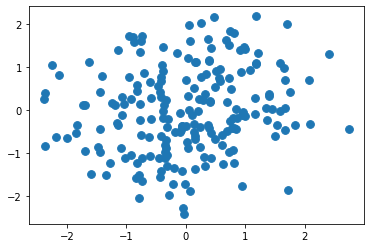

In [38]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [39]:
from sklearn.cluster import KMeans

In [40]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

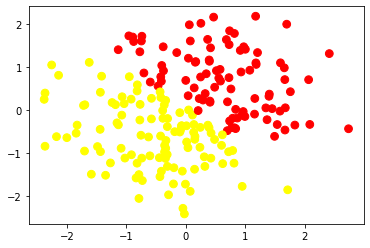

In [41]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [42]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

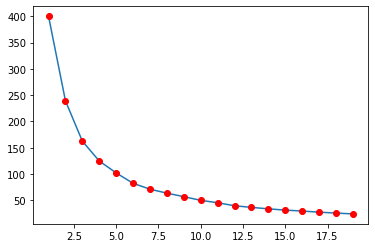

In [43]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [44]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

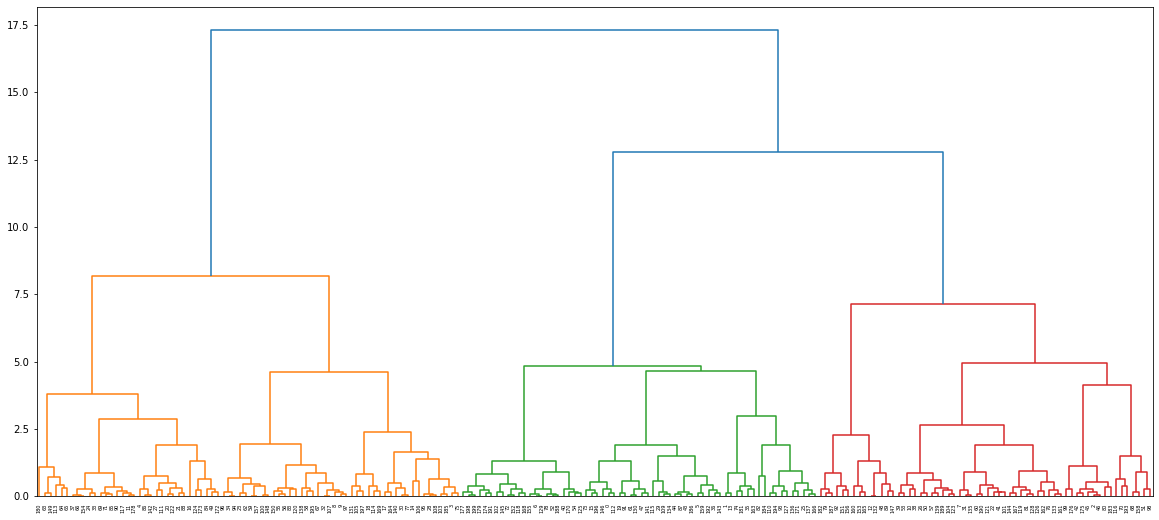

In [49]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [46]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [47]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

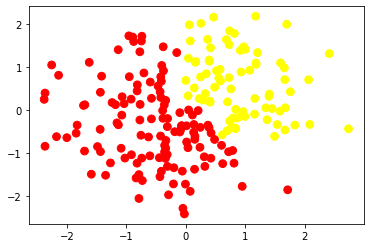

In [48]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)